In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

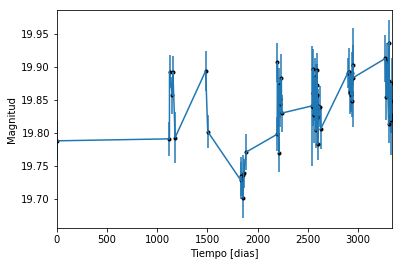

In [2]:
data = np.genfromtxt('LC_20907_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

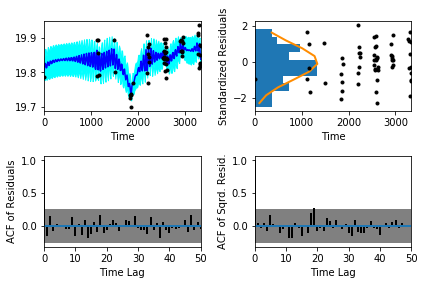

In [5]:
sample.assess_fit()

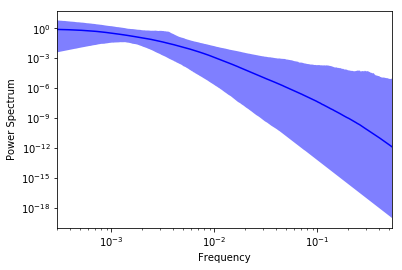

Text(0.000374595,0.0869186,'Medida del nivel de ruido')

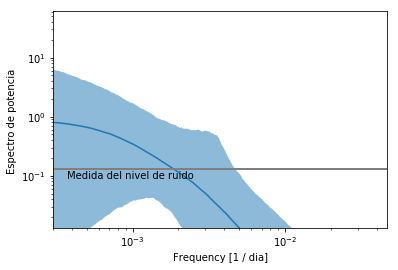

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

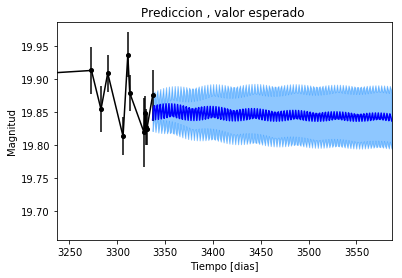

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

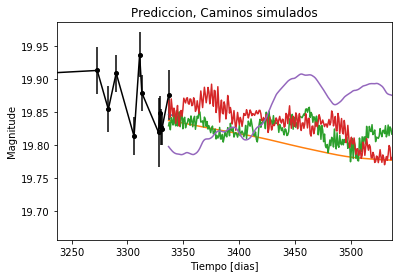

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


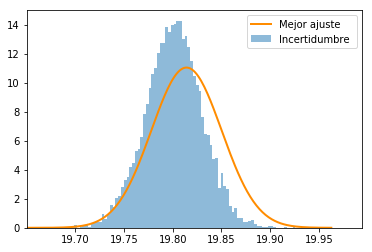

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

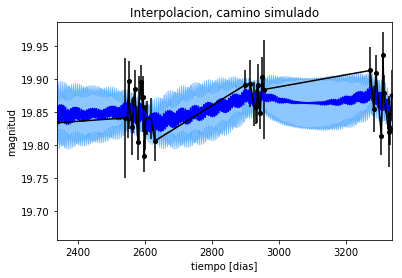

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

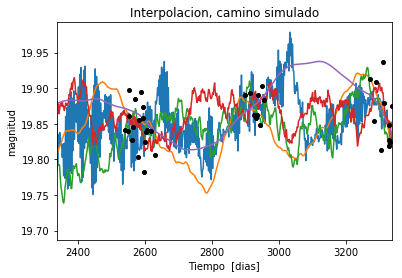

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 781.425356012
Median: 0.00764901284526
Standard deviation: 0.185466904975
68% credibility interval: [ 0.00079651  0.15911584]
95% credibility interval: [  3.50932965e-04   7.32099164e-01]
99% credibility interval: [  3.10212063e-04   9.81930094e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 507.076345762
Median: 0.0021855918905
Standard deviation: 0.0797831665583
68% credibility interval: [ 0.00051776  0.02467245]
95% credibility interval: [ 0.00032704  0.2399205 ]
99% credibility interval: [  3.04856284e-04   6.14897827e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 465.821665072
Median: 0.0182258940855
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 911.140742815
Median: 129.761348178
Standard deviation: 1.58735188145
68% credibility interval: [ 127.99128339  130.81844649]
95% credibility interval: [ 125.51296685  131.48604935]
99% credibility interval: [ 123.54598256  132.49335676]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 426.90940547
Median: 0.618035849688
Standard deviation: 2.24138551418
68% credibility interval: [ 0.05795153  3.89511491]
95% credibility interval: [ 0.01453329  7.52865715]
99% credibility interval: [  0.01062223  10.53833158]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 543.123531659
Median: 0.509965947035
Standard deviation: 9.64503302149
68% credibility interval: [ 0.01345151  9.01747718]
95% credibility interval: [  8.24887274e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 1.43663031727e-59
Standard deviation: 9.46044676842e+151
68% credibility interval: [  1.05430478e-101   1.68430569e+000]
95% credibility interval: [  4.17672168e-174   2.47130638e+131]
99% credibility interval: [  4.84742043e-211   4.94247367e+151]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2139.94629063
Median: 19.8318300786
Standard deviation: 0.0252207016667
68% credibility interval: [ 19.81072898  19.85096935]
95% credibility interval: [ 19.77881205  19.87932177]
99% credibility interval: [ 19.74851773  19.90686902]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 435.041305655
Median: 0.0141920205236
Standard deviation: 0.250425491316
68% credibility interval: [ 0.          0.38433259]
95% credibility interval: [ 0.          0.89090876]
99% credibility interval: [ 0.          1.03538793]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 435.041305655
Median: 0.0141920205236
Standard deviation: 0.250425491316
68% credibility interval: [ 0.          0.38433259]
95% credibility interval: [ 0.          0.89090876]
99% credibility interval: [ 0.          1.03538793]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 613.382415437
Median: 0.0
Standard deviation: 0.000934023551387
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 911.140742815
Median: 129.761348178
Standard deviation: 1.58735188145
68% credibility interval: [ 127.99128339  130.81844649]
95% credibility interval: [ 125.51296685  131.48604935]
99% credibility interval: [ 123.54598256  132.49335676]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1910.99894164
Median: 0.00245722444404
Standard deviation: 0.00372922391318
68% credibility interval: [ 0.0014173   0.00474733]
95% credibility interval: [ 0.00085247  0.01159361]
99% credibility interval: [ 0.00062234  0.02338808]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1072.69198921
Median: 1.23098286634
Standard deviation: 0.189397098934
68% credibility interval: [ 1.05747806  1.41857154]
95% credibility interval: [ 0.90446844  1.65257805]
99% credibility interval: [ 0.80702166  1.83932591]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1479.69170779
Median: 3.45583498778e-05
Standard deviation: 0.0797251692467
68% credibility interval: [  2.20069790e-08   3.11163448e-03]
95% credibility interval: [  2.15845127e-134   1.72245381e-001]
99% credibility interval: [  5.56488534e-155   6.03851435e-001]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 781.425356012
Median: (-0.0480601651238+0j)
Standard deviation: 1.95800527222
68% credibility interval: [-0.99975429+0.j         -0.00500463-0.01385874j]
95% credibility interval: [ -4.59991471e+00-2.72533041j  -2.20497685e-03-0.82617844j]
99% credibility interval: [ -6.16964874e+00+0.j          -1.94911988e-03-0.06278325j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 507.076345762
Median: (-0.0137324788539+0.16540743359j)
Standard deviation: 1.65139371433
68% credibility interval: [-0.15502160 +5.96017636e+00j -0.00325317 +4.58467380e-03j]
95% credibility interval: [-1.50746494+1.1247122j  -0.00205485+0.01363865j]
99% credibility interval: [ -3.86351699e+00+0.j  -1.91546852e-03+0.j]
Posterior summary for parameter 